In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# Reading the data
df = pd.read_csv('C:/Data/pdsassignment2/cleaned_diabetes_data.csv')

In [5]:
# Set a seed for reproducibility
np.random.seed(123)

In [6]:
# Take a random sample of 25 observations
sample = df.sample(n=25)

In [7]:
# Calculate the mean Glucose and highest Glucose values of the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()


In [8]:
# Calculate the population mean and highest Glucose values
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

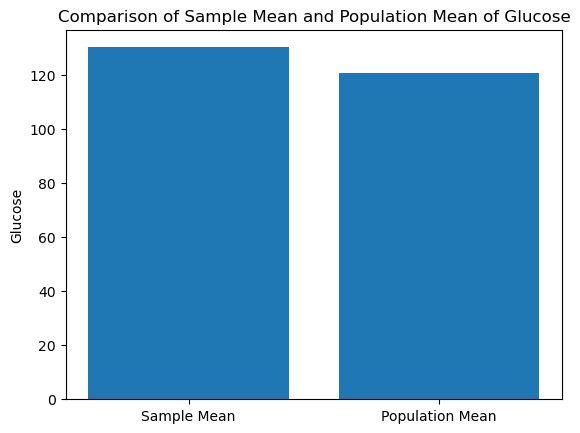

In [9]:
# Plot the sample mean and population mean on a bar chart
plt.bar(['Sample Mean', 'Population Mean'], [sample_mean_glucose, pop_mean_glucose])
plt.title('Comparison of Sample Mean and Population Mean of Glucose')
plt.ylabel('Glucose')
plt.show()

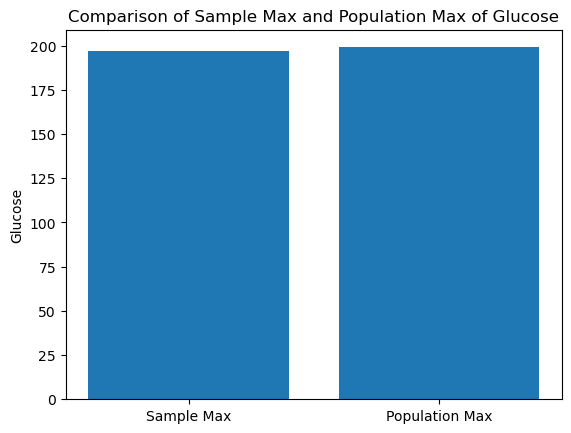

In [10]:
# Plot the sample max and population max on a bar chart
plt.bar(['Sample Max', 'Population Max'], [sample_max_glucose, pop_max_glucose])
plt.title('Comparison of Sample Max and Population Max of Glucose')
plt.ylabel('Glucose')
plt.show()

In [11]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [12]:
# Calculate the 98th percentile of BMI for the sample and population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
pop_98th_percentile_bmi = np.percentile(df['BMI'], 98)


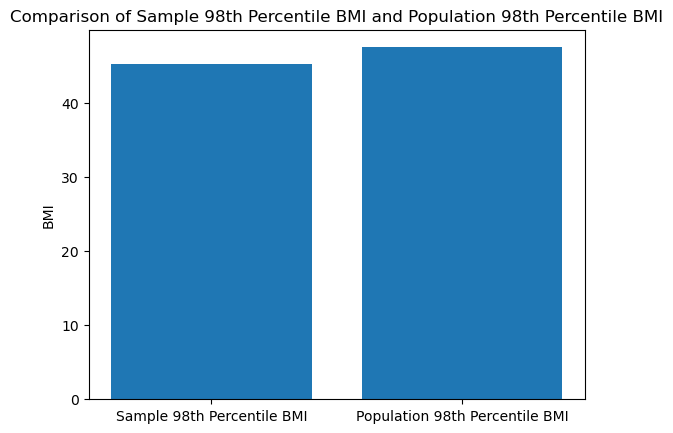

In [14]:
# Plot the sample 98th percentile and population 98th percentile on a bar chart
plt.bar(['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'], [sample_98th_percentile_bmi, pop_98th_percentile_bmi])
plt.title('Comparison of Sample 98th Percentile BMI and Population 98th Percentile BMI')
plt.ylabel('BMI')
plt.show()


In [15]:
# Create an empty list to store the statistics for BloodPressure for each sample
bp_mean_list = []
bp_std_list = []
bp_percentile_list = []

In [16]:
# Set the number of samples and sample size
num_samples = 500
sample_size = 150


In [17]:
# Create 500 samples of 150 observations each using bootstrap resampling
for i in range(num_samples):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    bp_mean_list.append(sample.mean())
    bp_std_list.append(sample.std())
    bp_percentile_list.append(np.percentile(sample, 95))


In [18]:
# Calculate the population mean, standard deviation, and percentile for BloodPressure
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_percentile = np.percentile(df['BloodPressure'], 95)

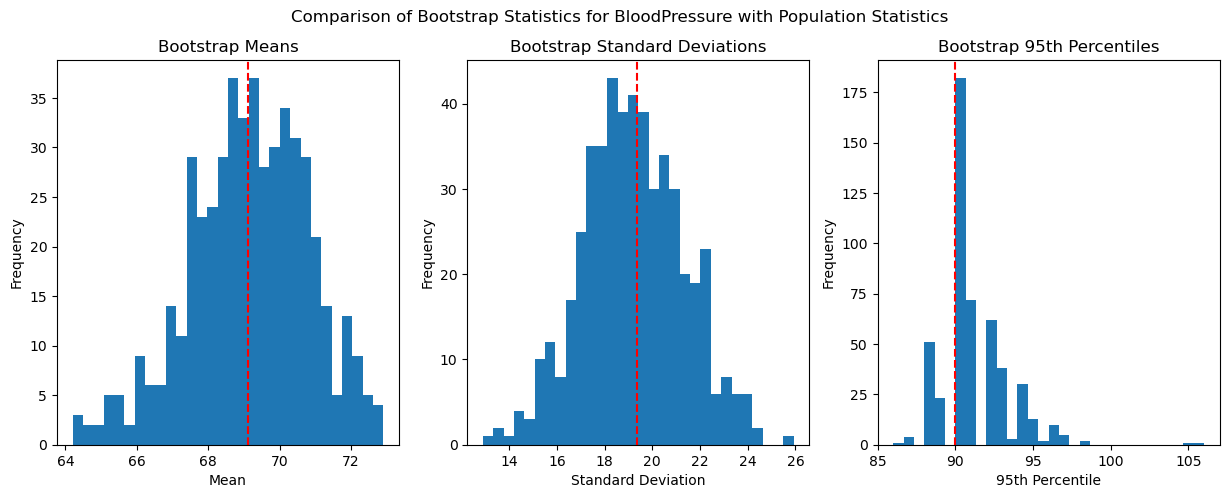

In [19]:
# Plot the distribution of bootstrap means, standard deviations, and percentiles, and the population statistics
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(bp_mean_list, bins=30)
axs[0].axvline(x=pop_bp_mean, color='r', linestyle='--')
axs[0].set_title('Bootstrap Means')
axs[0].set_xlabel('Mean')
axs[0].set_ylabel('Frequency')

axs[1].hist(bp_std_list, bins=30)
axs[1].axvline(x=pop_bp_std, color='r', linestyle='--')
axs[1].set_title('Bootstrap Standard Deviations')
axs[1].set_xlabel('Standard Deviation')
axs[1].set_ylabel('Frequency')

axs[2].hist(bp_percentile_list, bins=30)
axs[2].axvline(x=pop_bp_percentile, color='r', linestyle='--')
axs[2].set_title('Bootstrap 95th Percentiles')
axs[2].set_xlabel('95th Percentile')
axs[2].set_ylabel('Frequency')

plt.suptitle('Comparison of Bootstrap Statistics for BloodPressure with Population Statistics')
plt.show()